# <font size = 7>Visualization Analysis of Internship Positions on Internship Recruitment Website ShiXiSeng

## <font size = 6> Backgroud

<font size = 3.5>In senior year, many college students start to look for an internship. Some students may get overwhelmed when they open a recruitment website and find so many internship positions. Which industry demands the most interns? Where can I get higher intern salary? These questions may confuse many students. As a result, in this project, we want to analyze those internship positions in China.

<font size=3.5>ShiXiSeng is a website that specializes in providing internship recruitment services in China. You can find thousands of internships posted there. We build a Python craweler to crawel related data from it.

## <font size = 6>Basic information about the dataset

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [2]:
df = pd.read_csv('internship data(2).csv')
df.shape

(9988, 13)

In [3]:
df.head()

,name,company,city,day,salary,academic,duration,industry,company_size,goodlist,info,salary_min,salary_max
0,HRBP实习生-招聘方向,百丽国际,深圳,5,150-200/天,本科,3,快消 百货 批发 零售,2000人以上,hr hrbp 招聘,工作职责：协助HR高效完成指定的招聘相关工作；通过各种招聘渠道筛选候选人简历，意向人选的电话...,150,200
1,合作伙伴关系办公室实习生,上海迪士尼度假区,上海,4,150-180/天,本科,6,广告 传媒 公关 展览,2000人以上,留学生实习 迪士尼特色福利,职位概要：合作伙伴关系办公室实习生将置身于充满迪士尼神奇的上海迪士尼乐园，组织丰富多彩的大型...,150,180
2,百科视频挂载编辑,东句南章文化,成都,5,面议,大专,3,广告 传媒 公关 展览,15-50人,远程实习 零基础实习 不加班,从多维度完善词条信息，按照要求每天完成相应任务量。由于是远程居家实习，需要核查每天任务完成质...,面议,面议
3,数据分析实习生,百丽国际,深圳,5,150-180/天,不限,3,快消 百货 批发 零售,2000人以上,数据分析 经营分析 市场数据调研 业务数据分析,岗位描述：工作职责：1、负责项目报表的制作；2、负责常规业务数据提取，处理及分析工作；3、协...,150,180
4,美妆个护内容运营实习生,得物App,上海,5,180-200/天,本科,3,互联网 游戏 软件,2000人以上,周末双休 地铁周边 餐补 实习津贴,岗位职责：1、协助完成新媒体平台内容产出，完成内容的拍摄、排版、剪辑工作2、对内容有可落实的...,180,200


<font size=3.5> This dataset is about interships posted on ShiXiSeng, a popular Chinese internship recruitment website. The dataset contains 9988 latest internship positions as of May 15, 2024. For each internship, 13 features are given. These 13 features are listed and explained below.</font>
+ <font size=3.5>name: string, the name of the internship
+ <font size=3.5>company: string, the name of the company which provides the position
+ <font size=3.5>city: string, the city you work in
+ <font size=3.5>day: integer, range from 1 to 7, the number of days you have to work in a week
+ <font size=3.5>salary: string, the salary you earn for each day, for some internships this feature is displayed as '面议', which means you have to negotiate with the manager to determine your salary
+ <font size=3.5>academic: string, the minimum educational requirement for this position, can take value '大专', '本科', '硕士', '博士' and '不限', referring to 'Associate Degree', 'Bachelor Degree', 'Master Degree', 'Ph.D' and 'No Limit', respectively
+ <font size=3.5>duration: integer, the number of month this internship lasts
+ <font size=3.5>industry: string, the industry of this position
+ <font size=3.5>company_size: string, the scale of employees in this company
+ <font size=3.5>goodlist: string, advantages or well_beings of the position
+ <font size=3.5>info: str, detailed information about the position, including position responsibility, position requirements and so on


## <font size = 6>feature description and analysis

### <font size = 5> City overview

<font size = 3.5>We first look at the city distribution for these internship. We find the top 10 cities that have the most positions and put them in a bar chart.

In [4]:
city_count = df['city'].value_counts()
other = np.sum(city_count[10:]) # the number of position in cities other than top 10 cities
print(city_count[:10])
print(other)

上海    3573
北京    2568
深圳     682
广州     613
成都     397
杭州     339
南京     186
武汉     178
苏州     154
西安      93
Name: city, dtype: int64
1205


In [5]:
bar_data = city_count[:10]
bar_data['other'] = other 
bar_data.index = ['Shanghai','Beijing','Shenzhen','Guangzhou','Chengdu','Hangzhou','Nanjing','Wuhan','Suzhou',"Xi'an",'Other']

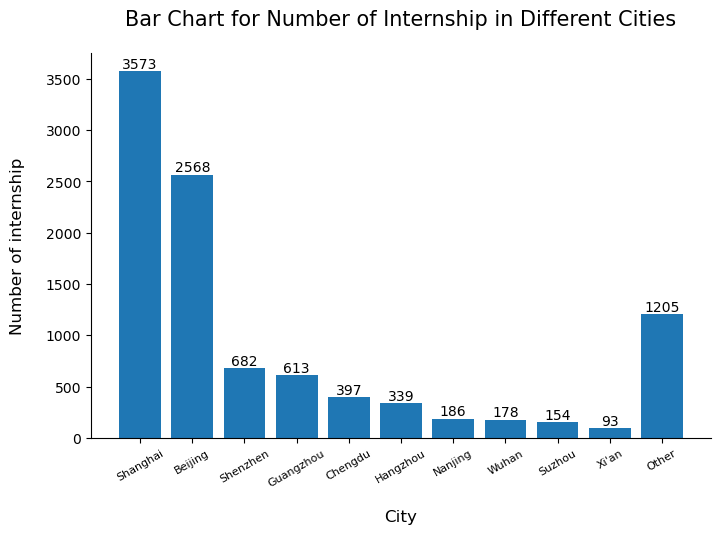

In [6]:
fig = plt.figure(figsize=(8,5),dpi = 100)
ax = plt.gca()
bar = plt.bar(bar_data.index,bar_data.values)
plt.title('Bar Chart for Number of Internship in Different Cities',size = 15,x=0.5,y=1.05)
plt.xlabel('City',size = 12,labelpad = 15)
plt.ylabel('Number of internship',size = 12,labelpad = 15)
plt.xticks(rotation = 30,size = 8)
plt.bar_label(bar)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

<font size = 3.5>As we can see above, Shanghai, the most developed city in China, has the most internships. Following Shanghai are Beijing, Shenzhen and Guangzhou. In fact, these four cities are recognized as the most developed four cities in China by Chinese people. Lots of companies and firms, including some world-famous ones, are located there and have a great demand for interns. As a result, if you want to have more opportunities, these four cities will definitely be the best choice.

### <font size = 5>Workday overview

<font size = 3.5>Number of workday in a week is also what a funture intern care about. No one is willing to work more than 5 days a week. We draw a pie chart to observe the distribution of number of workdays. 

In [7]:
day_count = df['day'].value_counts()
day_pct = day_count/df.shape[0]*100
day_pct

5    64.727673
4    17.701241
3    12.955547
6     2.442932
2     0.790949
7     0.760913
1     0.620745
Name: day, dtype: float64

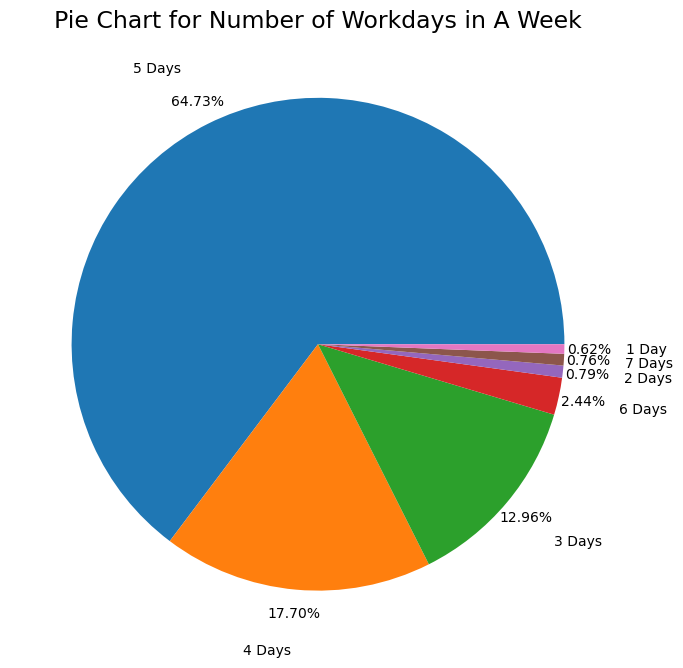

In [8]:
fig = plt.figure(figsize = (8,8))

labels = []
for i in day_pct.index:
    if i == 1:
        labels.append(str(i)+' '+'Day')
    else:
        labels.append(str(i)+' '+'Days')
        
plt.pie(day_pct, labels = labels, autopct = '%1.2f%%',labeldistance = 1.25, pctdistance = 1.1)
plt.title('Pie Chart for Number of Workdays in A Week',size = 17)
plt.show()

<font size = 3.5>From the pie chart, we can see that most of internships have weekdays fewer than 6 days. Only 2.44% of positions require 6 workdays a week and 0.79% have no day off. As a result, don't worry too much about your rest days! 


### <font size = 5> Duration overview 

<font size = 3.5>For sophomore and junior students, they can just choose internships that last shorter than 3 months-- their summer vacation can't be longer! In the bar chart below, we can find how many internships are suitable for sophomore and junior students.

In [9]:
duration_count = df['duration'].value_counts()
duration_count = duration_count[[1,2,3,4,5,6,7,8,9,10,11,12]]
duration_count

1      230
2      381
3     6422
4      616
5      208
6     1857
7       14
8       18
9       12
10      24
11       6
12     200
Name: duration, dtype: int64

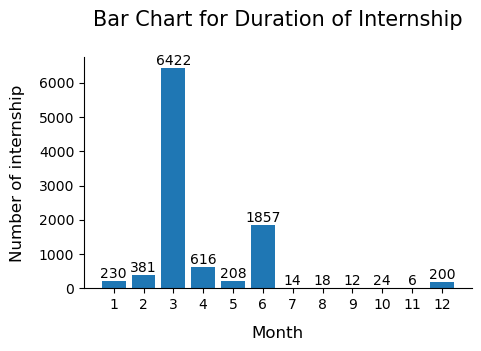

In [10]:
fig = plt.figure(figsize=(5,3))
ax = plt.gca()
bar = plt.bar(duration_count.index.astype(str), duration_count)
plt.xlabel('Month',labelpad = 10,size = 12)
plt.ylabel('Number of internship',labelpad = 10,size = 12)
plt.title('Bar Chart for Duration of Internship',size = 15, y=1.1)
plt.bar_label(bar)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

<font size = 3.5>Most positions last 3 months. What good news for students who can only work in summer vacations! Following 3-month internship is 6-month internship. Hiring a half-year intern is also a preferred choice for companies.   

### <font size = 5>Industry overview

In [11]:
np.unique(df['industry'])

array(['不限', '专业服务(咨询 财会 法律 翻译等)', '互联网 游戏 软件', '互联网 移动互联网 电子商务',
       '交通 贸易 物流', '企业服务 咨询', '公共事业 NGO 政府', '农林牧渔 其他', '制药 生物工程',
       '化工 能源 环保', '医疗 健康 制药 生物', '广告 传媒 公关 展览', '广告 公关 市场推广 会展',
       '影视 媒体 艺术 文化 出版', '快消 百货 批发 零售', '房产 家居 物业 建筑', '教育 培训',
       '教育 培训 学术 科研 院校', '旅游 酒店 餐饮服务 生活服务', '检测 认证', '汽车 机械 制造',
       '电子 通信 硬件', '计算机软件', '金融 经济 投资 财会', '餐饮 酒店 旅游 娱乐'], dtype=object)

In [12]:
for i in df.index: # merge the industries that are actually the same but have different descriptions on the website
    if df.loc[i,'industry'] == '旅游 酒店 餐饮服务 生活服务':
        df.loc[i,'industry'] = '餐饮 酒店 旅游 娱乐'
    if df.loc[i,'industry'] in ['计算机软件','互联网 游戏 软件','互联网 移动互联网 电子商务']:
        df.loc[i,'industry'] = '互联网 游戏 软件 电商'
    if df.loc[i,'industry'] == '制药 生物工程':
        df.loc[i,'industry'] = '医疗 健康 制药 生物'
    if df.loc[i,'industry'] == '广告 公关 市场推广 会展':
        df.loc[i,'industry'] = '广告 传媒 公关 展览'
    if df.loc[i,'industry'] in ['教育 培训','教育 培训 学术 科研 院校']:
        df.loc[i,'industry'] = '教育 培训 科研'
    if df.loc[i,'industry'] == '专业服务(咨询 财会 法律 翻译等)':
        df.loc[i,'industry'] = '企业服务 咨询'
    if df.loc[i,'industry'] == '检测 认证':
        df.loc[i,'industry'] = '公共事业 NGO 政府'

In [13]:
np.unique(df['industry'])

array(['不限', '互联网 游戏 软件 电商', '交通 贸易 物流', '企业服务 咨询', '公共事业 NGO 政府',
       '农林牧渔 其他', '化工 能源 环保', '医疗 健康 制药 生物', '广告 传媒 公关 展览',
       '影视 媒体 艺术 文化 出版', '快消 百货 批发 零售', '房产 家居 物业 建筑', '教育 培训 科研',
       '汽车 机械 制造', '电子 通信 硬件', '金融 经济 投资 财会', '餐饮 酒店 旅游 娱乐'], dtype=object)

<font size = 3.5>Choosing a popular industry can increase the chance of finding a good internship. After viewing those industry tags given by the website for each position and merging some very similar ones, we can get 17 categories of industries. They are listed as below.
+ <font size = 3.5>'No Limit'
+ <font size = 3.5>'Internet': Internet, software, computer and e-commerce
+ <font size = 3.5>'Logistics': logistics, transportation and trade
+ <font size = 3.5>'Enterprise Service': enterprise service and consulting
+ <font size = 3.5>'Public Service': public service, NGO and government
+ <font size = 3.5>'Agriculture': agriculture, forestry, animal husbandry and fishing
+ <font size = 3.5>'Chemical Industry': chemical industry, energy and environment protection
+ <font size = 3.5>'Health': medical treatment, health, pharmacy and biology
+ <font size = 3.5>'Advertising': advertising, media, public relation and exhibition
+ <font size = 3.5>'Art': film, television media, art, culture and publishing
+ <font size = 3.5>'Retail': wholesale and retail
+ <font size = 3.5>'House': house, furniture and construction
+ <font size = 3.5>'Education': eduction, training and research
+ <font size = 3.5>'Manufacturing': automotive, machinery and manufacturing
+ <font size = 3.5>'Electronic': electronic, communication and hardware
+ <font size = 3.5>'Finance': finance, economy, investment and accounting
+ <font size = 3.5>'Hotel': dining, hotel, travel and entertainment

<font size = 3.5>We just pick the 7 industries that provide the most internship positions and others as a new catogory called 'Other' to draw a pie chart.

In [14]:
industry_count = df['industry'].value_counts()
industry_count

互联网 游戏 软件 电商      3994
金融 经济 投资 财会        959
汽车 机械 制造           799
广告 传媒 公关 展览        777
企业服务 咨询            714
教育 培训 科研           528
医疗 健康 制药 生物        506
快消 百货 批发 零售        391
电子 通信 硬件           369
房产 家居 物业 建筑        289
化工 能源 环保           156
餐饮 酒店 旅游 娱乐        129
不限                 128
公共事业 NGO 政府        108
交通 贸易 物流           106
农林牧渔 其他             31
影视 媒体 艺术 文化 出版       4
Name: industry, dtype: int64

In [15]:
other = np.sum(industry_count[7:])
industry_top = industry_count[:7]
industry_top.index = ['Internet','Finance','Manufacturing','Advertising','Enterprise Service','Eduction','Health']
industry_top['Other'] = other
industry_pct = industry_top/df.shape[0]*100
industry_pct

Internet              39.987986
Finance                9.601522
Manufacturing          7.999600
Advertising            7.779335
Enterprise Service     7.148578
Eduction               5.286344
Health                 5.066079
Other                 17.130557
Name: industry, dtype: float64

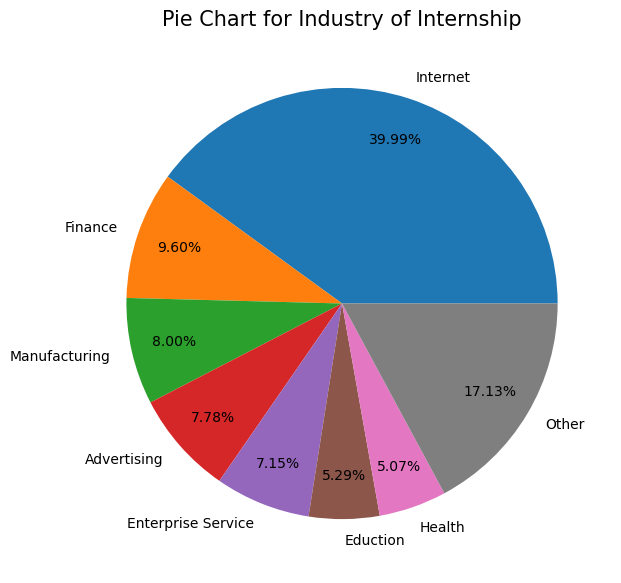

In [16]:
fig = plt.figure(figsize = (7,7))
plt.pie(industry_pct,labels = industry_pct.index,autopct = '%1.2f%%',pctdistance = 0.8)
plt.title('Pie Chart for Industry of Internship',size = 15)
plt.show()

<font size = 3.5>In the information age, Internet Industry is the most popular industry and provides the most positions. 'Finance' and 'Manufacturing' follow.

### <font size = 5>Education background requirement for different industries

<font size = 3.5>Those popular industries attrack lots of people. However, not all people will have the chance to get in. Many people may be refused because of their unqualified education background. We try to use a stack bar chart to analyze that.

In [17]:
df['industry_'] = df['industry']

# change the 'industry' values to the category names we newly defined
for i in df.index:
    for m,n in zip(industry_count.index[:7],industry_top.index[:7]):
        if df.loc[i,'industry_'] == m:
            df.loc[i,'industry_'] = n
            break
            
    if df.loc[i,'industry_'] not in industry_top.index: # the top 7 industry
        df.loc[i,'industry_'] = 'Other'

        
# convert the 'academic' values to their English ones
for i in df.index:
    if df.loc[i,'academic'] == '不限':
        df.loc[i,'academic'] = 'No Limit'
    if df.loc[i,'academic'] == '大专':
        df.loc[i,'academic'] = 'Associate'
    if df.loc[i,'academic'] == '本科':
        df.loc[i,'academic'] = 'Bachelor'
    if df.loc[i,'academic'] == '硕士':
        df.loc[i,'academic'] = 'Master'
    if df.loc[i,'academic'] == '博士':
        df.loc[i,'academic'] = 'Ph.D'

In [18]:
# the pivot table with respect to 'industry' and 'academic'
df_industry_academic = df.pivot_table('info',index = 'industry_',columns = 'academic',aggfunc = 'count')
df_industry_academic = df_industry_academic.fillna(0).astype(int)
df_industry_academic = df_industry_academic.loc[industry_top.index]
df_industry_academic

academic,Associate,Bachelor,Master,No Limit,Ph.D
Internet,161,2951,348,526,8
Finance,26,559,280,87,7
Manufacturing,57,537,93,108,4
Advertising,69,509,24,175,0
Enterprise Service,51,476,103,82,2
Eduction,52,350,29,95,2
Health,69,308,65,64,0
Other,206,920,202,379,4


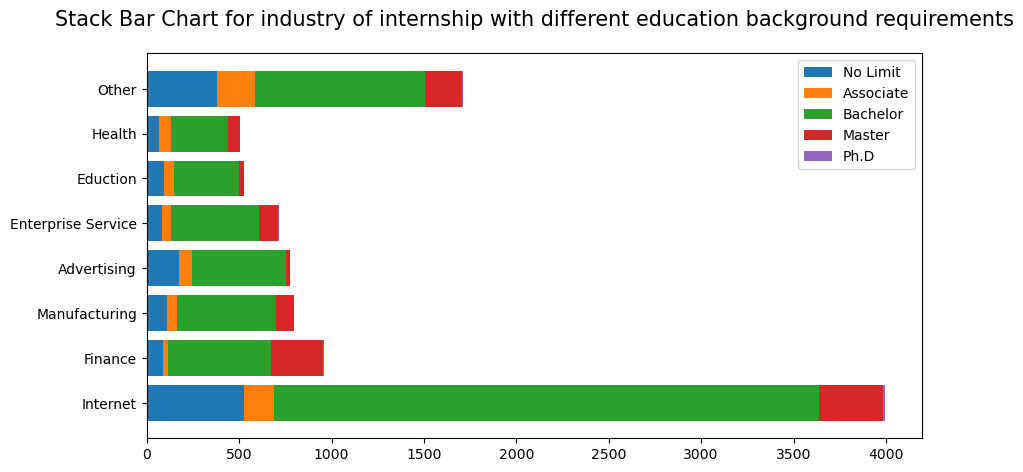

In [19]:
fig = plt.figure(figsize = (10,5))
plt.barh(df_industry_academic.index,df_industry_academic['No Limit'],label = 'No Limit')
plt.barh(df_industry_academic.index,df_industry_academic['Associate'],label = 'Associate',
         left = df_industry_academic['No Limit'])
plt.barh(df_industry_academic.index,df_industry_academic['Bachelor'],label = 'Bachelor',
         left = df_industry_academic['No Limit']+df_industry_academic['Associate'])
plt.barh(df_industry_academic.index,df_industry_academic['Master'],label = 'Master',
         left = df_industry_academic['No Limit']+df_industry_academic['Associate']+df_industry_academic['Bachelor'])
plt.barh(df_industry_academic.index,df_industry_academic['Ph.D'],label = 'Ph.D',
         left = df_industry_academic['No Limit']+df_industry_academic['Associate']+df_industry_academic['Bachelor']+df_industry_academic['Master'])
plt.legend()
plt.title('Stack Bar Chart for industry of internship with different education background requirements',y = 1.05,size = 15)
plt.show()

<font size = 3.5>A bachelor degree is enough for most positions in any industry. For 'Finance' industry, it needs the highest proportion of masters compared to other industries. In this bar chart, we can hardly see the bars for Ph.D-- doctoral interns are just overqualified.

### <font size = 5>The industry distribution for different cities

<font size = 3.5>We have known that the four most developed cities, Shanghai, Beijing, Shenzhen and Guangzhou, provide the most internship opportunities. However, in terms of one particular industry, which city provides the most opportunities? 

In [20]:
df_industry_city = df.pivot_table('info',index = 'industry_',columns = 'city',aggfunc = 'count')
df_industry_city_4 = df_industry_city[['上海','北京','深圳','广州']].astype(int)
df_industry_city_4

city,上海,北京,深圳,广州
industry_,,,,
Advertising,342,199,32,73
Eduction,94,164,27,37
Enterprise Service,293,134,46,56
Finance,410,256,99,34
Health,210,74,21,22
Internet,1320,1399,213,260
Manufacturing,349,112,13,7
Other,555,230,231,124


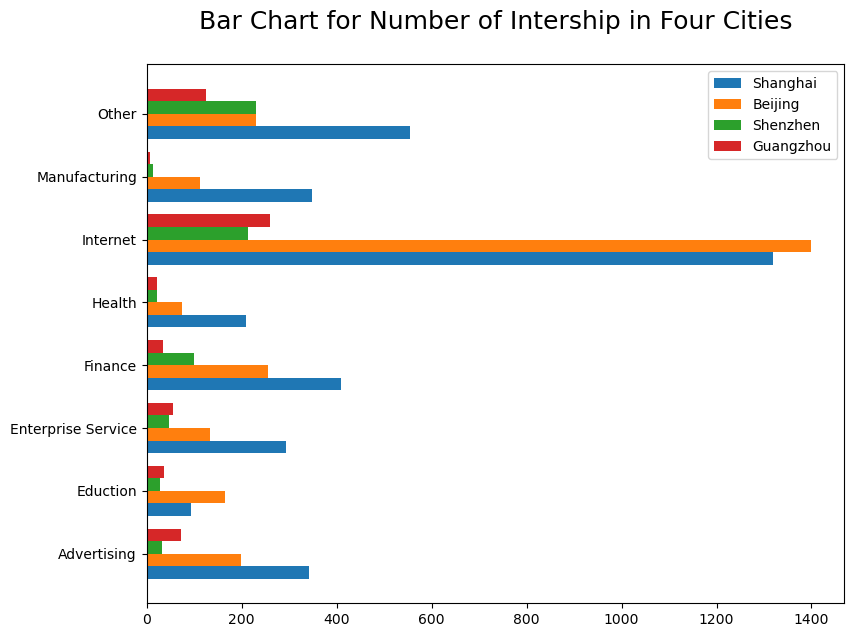

In [21]:
fig = plt.figure(figsize = (9,7))
height = 0.2
bar1 = plt.barh(np.arange(len(df_industry_city_4.index))-1.5*height,df_industry_city_4['上海'],label = 'Shanghai',height = height)
bar2 = plt.barh(np.arange(len(df_industry_city_4.index))-0.5*height,df_industry_city_4['北京'],label = 'Beijing',height = height)
bar3 = plt.barh(np.arange(len(df_industry_city_4.index))+0.5*height,df_industry_city_4['深圳'],label = 'Shenzhen',height = height)
bar4 = plt.barh(np.arange(len(df_industry_city_4.index))+1.5*height,df_industry_city_4['广州'],label = 'Guangzhou',height = height)
plt.yticks(np.arange(len(df_industry_city_4.index)),df_industry_city_4.index)
plt.legend()
plt.title('Bar Chart for Number of Intership in Four Cities',size = 18,y = 1.05)
plt.show()

<font size = 3.5>Shanghai and Beijing surpass Shenzhen and Guangzhou in any industry. Shanghai provides more positions in 'Other', 'Manufacturing', 'Health', 'Finance', 'Enterprise Service' and 'Advertising', while Beijing has more 'Internet' and 'Education' positions. 

### <font size = 5>Salary overview

<font size = 3.5>Salary level is paid great attention to when we look for an internship. In our data, salary is given in three ways: negotiable, salary interval and determined salary. We first have a look at different salary types. 

In [22]:
salary_type = []
for sa in df['salary']:
    if sa == '面议': # negotiable
        salary_type.append('Negotiable')
    elif '-' in sa: # salary interval
        salary_type.append('Salary Interval')
    else: # determined salary
        salary_type.append('Determined Salary')
        
salary_type = pd.Series(salary_type)

In [23]:
salary_type_count = salary_type.value_counts()
salary_type_pct = salary_type_count/df.shape[0]*100
salary_type_pct

Salary Interval      74.128955
Determined Salary    18.061674
Negotiable            7.809371
dtype: float64

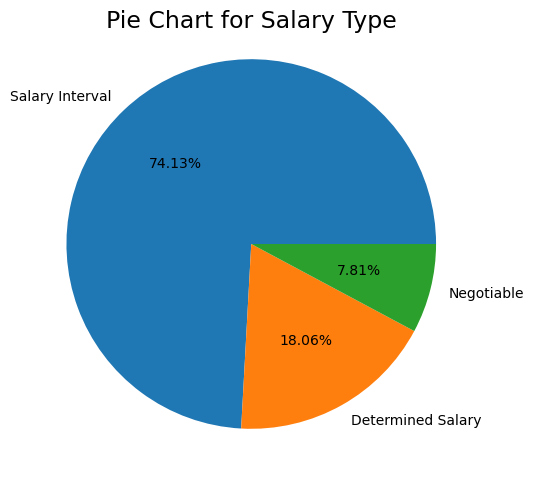

In [24]:
fig = plt.figure(figsize = (6,6))
plt.pie(salary_type_pct, labels = salary_type_pct.index, autopct = '%1.2f%%')
plt.title('Pie Chart for Salary Type',size = 17,y = 0.95)
plt.show()

<font size = 3.5> Most of internships will not provide a determined salary. They often give you salary intervals. As a result, you may need to show your capability during your interview and work to get the higher wage. However, there are also 7.81% of internships can't gurantee your salary level. Be careful and cautious when you deicide to get such position! 

<font size = 3.5>We also have a look at salary levels other than the ones negotiable. For salary level that is given as an interval, we get its minimum and maximum. If a determined salary level is given, its minimum and maximum are the same.   

In [25]:
df_salary_not_negotiable = df[df['salary'] != '面议']
salary_not_negotiable = df_salary_not_negotiable[['salary_min','salary_max']].astype(int)

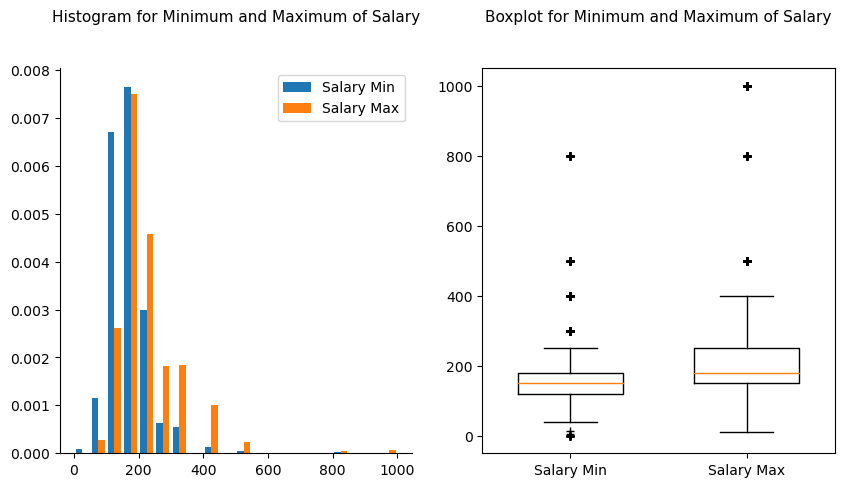

In [26]:
fig = plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
ax = plt.gca()
plt.hist(salary_not_negotiable,density = True, bins = 20, label = ['Salary Min','Salary Max'])
plt.legend()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.title('Histogram for Minimum and Maximum of Salary',size = 11,y = 1.1)

plt.subplot(1,2,2)
plt.boxplot(salary_not_negotiable,labels = ['Salary Min','Salary Max'],widths = 0.6,flierprops = {'marker':'+'})
plt.title('Boxplot for Minimum and Maximum of Salary',size = 11, y=1.1)
plt.show()

<font size = 3.5>As the two charts show, you can earn around 150 RMB a day at least and 200 RMB at most in most companies. Very few of companies would like to provide internship positions with daily wage greater than 400 RMB. So, if you are an ordinary job seeker for an internship, your expected daily salary may be 150-200 RMB. 

### <font size = 5>What makes the salary higher?

<font size = 3.5>An average of 150-200 RMB daily salary may not be satisfactory for everyone. Some internship seekers think they worth a position with 300 RMB daily salary. Then, how can they get such an internship?
    
<font size = 3.5>Here are some possible reasons that a position provide a higher salary:
+  <font size = 3.5>maybe the position is in a high-profit industry?
+  <font size = 3.5>maybe the position has a higher education background requirement?
+  <font size = 3.5>maybe the position is in a bigger company?
+  <font size = 3.5>maybe the position is in a city with a higher salary level?
+  <font size = 3.5>......

<font size = 3.5>To verify these assumptions above, we first draw some boxplots to have a quick look.

<font size = 3.5>For simplicity, we just ignore those positions with negotiable salary and compute the average of minimum and maximum salary as 'determined' salary for those positions with salary intervals. For the feature 'city', we just show 8 cities(Shanghai, Beijing, Shenzhen, Guangzhou, Chengdu, Hangzhou, Nanjing, Wuhan) and other cities as 'Other' category. For the feature 'industry', we just show the top 7 industries mentioned above and other industies as 'Other' category. For the Feature 'company_size', we set 6 categories, which are 'Unknown', '<15', '15-50', '50-500', '500-2000' and '>2000'.   

In [27]:
df1 = df.drop(df[df['salary'] == '面议'].index)
df1['salary_'] = (df1['salary_min'].astype(int)+df1['salary_max'].astype(int))/2
df1['city_'] = None
for i in df1.index:
    if df1.loc[i,'city'] not in ['上海','北京','深圳','广州','成都','杭州','南京','武汉']:
        df1.loc[i,'city_'] = 'Other'
    else:
        df1.loc[i,'city_'] = df1.loc[i,'city']
    if df1.loc[i,'company_size'] in ['15人以下','少于15人']:
        df1.loc[i,'company_size'] = '<15'
    elif df1.loc[i,'company_size'] in ['100-200','101-500人','150-500人','50-100人','50-150人']:
        df1.loc[i,'company_size'] = '50-500'
    elif df1.loc[i,'company_size'] == '500-2000人':
        df1.loc[i,'company_size'] = '500-2000'
    elif df1.loc[i,'company_size'] == '2000人以上':
        df1.loc[i,'company_size'] = '>2000'
    elif df1.loc[i,'company_size'] == '15-50人':
        df1.loc[i,'company_size'] = '15-50'
    else:
        df1.loc[i,'company_size'] = 'Unknown'
    

In [28]:
df_industry = []
for i in np.unique(df1['industry_']):
    df_industry.append(df1[df1['industry_'] == i]['salary_'].values)

df_academic = []
for i in np.unique(df1['academic']):
    df_academic.append(df1[df1['academic'] == i]['salary_'].values)

df_company_size = []
for i in np.unique(df1['company_size']):
    df_company_size.append(df1[df1['company_size'] == i]['salary_'].values)
    
df_city = []
for i in np.unique(df1['city_']):
    df_city.append(df1[df1['city_'] == i]['salary_'].values)


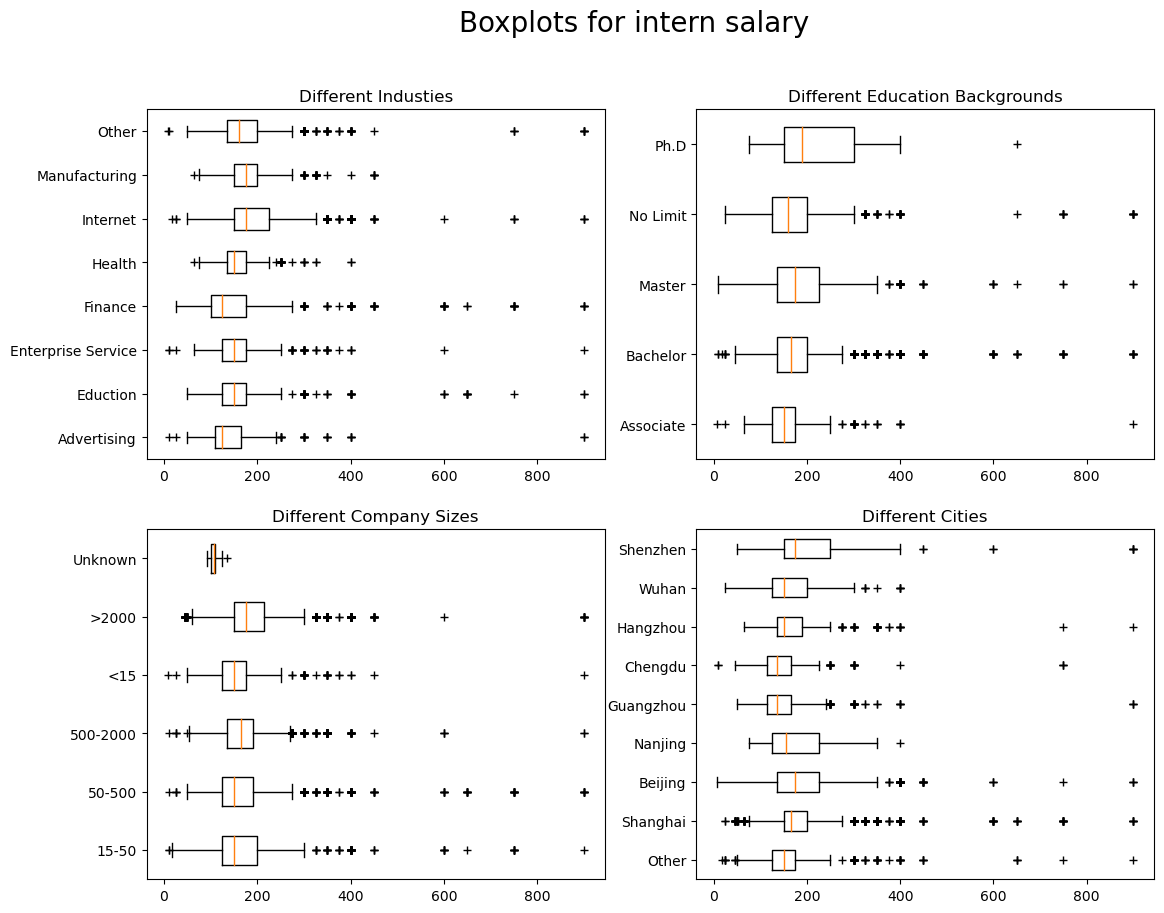

In [29]:
fig = plt.figure(figsize = (13,10))
fig.suptitle('Boxplots for intern salary',fontsize = 20)

ax1 = plt.subplot(2,2,1)
ax1.boxplot(df_industry, labels = np.unique(df1['industry_']),vert = False,flierprops = {'marker':'+'})
ax1.set_title('Different Industies')

ax2 = plt.subplot(2,2,2)
ax2.boxplot(df_academic, labels = np.unique(df1['academic']),vert = False,flierprops = {'marker':'+'})
ax2.set_title('Different Education Backgrounds')

ax3 = plt.subplot(2,2,3)
ax3.boxplot(df_company_size, labels = np.unique(df1['company_size']),vert = False,flierprops = {'marker':'+'})
ax3.set_title('Different Company Sizes')

ax4 = plt.subplot(2,2,4)
ax4.boxplot(df_city, labels = ['Other','Shanghai','Beijing','Nanjing','Guangzhou','Chengdu','Hangzhou','Wuhan','Shenzhen'],
            vert = False,flierprops = {'marker':'+'})
ax4.set_title('Different Cities')

plt.show()

<font size = 3.5>Observing the first boxplot, the 'Internet' and 'Manufacturing' industries have the highest salary level, while the 'Finance' and 'Advertising' industies have the lowest salary level. As to different education backgrounds, Ph.D interns have the highest salary level, followed by master interns and Bachelor interns-- this is consistent with our common sense! What's more, the third boxplot shows that larger companies indeed have a higher salary level. Last, the fourth boxplot tells us Shenzhen and Beijing have the highest intern wage level in China.

### <font size = 5> What wellfare or advantage make companies confident in appealing to intern seekers?

<font size = 3.5>To attrack excellent intern seekers, a company can list its advantages and wellfares as tags of its internship position on the website, which have been put together by us in the feature 'goodlist'. We use a wordcloud to see what advantage or wellfare do most companies believe makes them the best internship choice. 

In [30]:
from wordcloud import WordCloud

In [31]:
txt = ''
for t in df['goodlist']:
    txt = txt+' '+t

In [32]:
txt = re.sub('  *',' ',txt)

In [33]:
wordc = WordCloud(width = 800, height = 400, background_color = 'white',max_words = 50,
                 font_path = 'C:\Windows\Fonts\simkai.ttf',collocations=False).generate(txt)

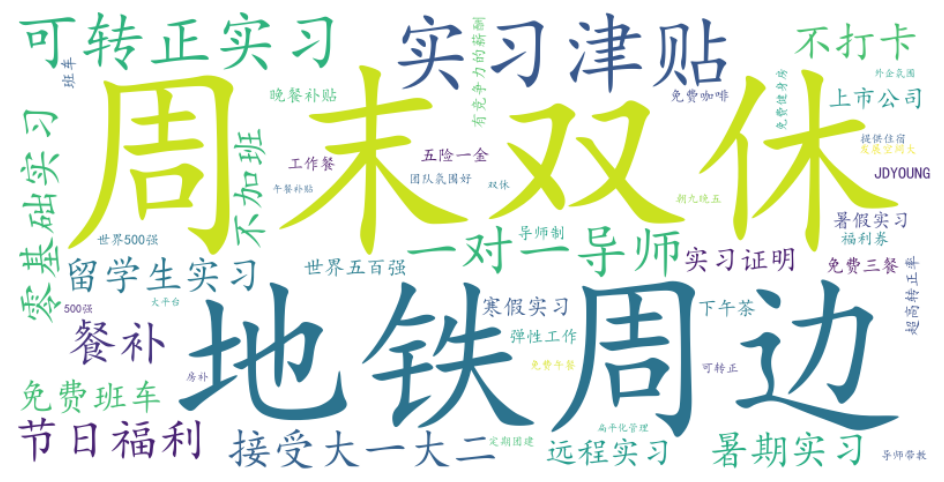

In [34]:
fig = plt.figure(figsize = (12,6))
plt.imshow(wordc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

<font size = 3.5>From the word cloud above, the four most mentioned advantages or wellfares are '周末双休(guarantee two weekends off)', '地铁周边(near subway)', '实习津贴(offer internship allowance)' and '可转正实习(a permanent internship is possible)'. These four tags tell us about the position's rest days, location, salary and chance to be permanent, which are also basic information we internship seekers want to know. Following these 4 are tags like '餐补(offer meal subsidy)', '一对一导师(one-to-one tutor)', '零基础实习(zero-basis internship)' and so on.

### <font size = 5>What programming language is most popular?

<font size = 3.5>Nowadays more and more internship positions requires programming skills, such as C, Python, SQL and so on. Many students may be familiar with 2-3 programming languages, but much fewer students can master more than 4 languages. As a result, it may be a wiser choice to learn programming languages that are required by a wider range of companies. We first draw a bar chart to see how many positions require a certain programming language. The programming languages we are counting include: C/C++, C#, Python, Java, SQL, R and HTML.

In [54]:
language_count = np.zeros(7)
for info in df['info']:
    u = re.sub('[^A-Za-z]',' ',info)
    u = re.sub('  *',' ',u)
    u = ' '+u+' '
    
    if re.search('C#',info,re.I) == None and re.search(' C ',u,re.I) != None:
        language_count[0] += 1
    if re.search('C#',info,re.I) != None:
        language_count[1] += 1
    if re.search('python',u,re.I) != None:
        language_count[2] += 1
    if re.search('java',u,re.I) != None:
        language_count[3] += 1
    if re.search('SQL',u,re.I) != None:
        language_count[4] += 1
    if re.search(' R ',u,re.I) != None:
        language_count[5] += 1
    if re.search('html',u,re.I) != None:
        language_count[6] += 1

language_count = language_count.astype(int)     

In [55]:
language_count

array([490,  46, 895, 465, 656,  97, 142])

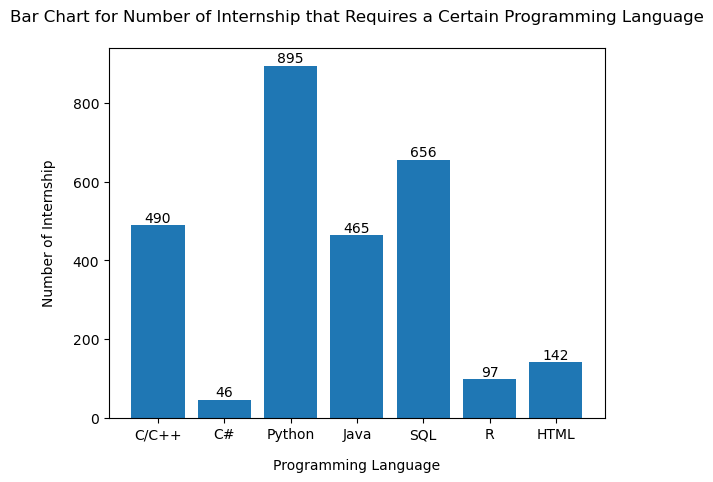

In [78]:
la_list = ['C/C++', 'C#', 'Python', 'Java', 'SQL', 'R', 'HTML']
fig = plt.figure()
bar = plt.bar(la_list,language_count)
plt.bar_label(bar)
plt.xlabel('Programming Language',size = 10,labelpad = 12)
plt.ylabel('Number of Internship',size = 10,labelpad = 12)
plt.title('Bar Chart for Number of Internship that Requires a Certain Programming Language',size = 12,y = 1.05)
plt.show()

<font size = 3.5>We can see that Python is the most popular programming language, followed by SQL, C/C++ and Java. So, if you just want to learn a programming language without any specific reason, Python is no doubt your first choice!